# 1.3. Gradient Descent

## This script contains the following:

### 1. Importing your libraries and data
### 2. Checking the original dataset
### 3. Compute loss and gradient descent for Madrid in 1995.

### 01. Import libraries and dataset

In [1]:
# Import libraries
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits import mplot3d

from plotly.offline import download_plotlyjs, init_notebook_mode
from plotly.offline import plot, iplot
import plotly.graph_objects as go

In [2]:
# Create path
path = r'C:\Users\Quinn\Documents\CF - Data Analysis\Machine Learning\ClimateWins'

In [3]:
# Import the dataset
climate = pd.read_pickle(os.path.join(path, '02 Data Sets', 'ClimateWin_Scaled.pkl'))
climate

DATE  MONTH        id  BASEL_cloud_cover  BASEL_wind_speed  \
0      19600101      1 -1.731975           0.660514          -0.02793   
1      19600102      1 -1.731824           0.244897          -0.02793   
2      19600103      1 -1.731673           1.076130          -0.02793   
3      19600104      1 -1.731523          -1.001953          -0.02793   
4      19600105      1 -1.731372           0.244897          -0.02793   
...         ...    ...       ...                ...               ...   
22945  20221027     10  1.731372          -1.833187          -0.02793   
22946  20221028     10  1.731523           0.244897          -0.02793   
22947  20221029     10  1.731673          -0.586336          -0.02793   
22948  20221030     10  1.731824          -0.170720          -0.02793   
22949  20221031     10  1.731975          -0.170720          -0.02793   

       BASEL_humidity  BASEL_pressure  BASEL_global_radiation  \
0            0.826097       -0.001949               -1.101066   
1            0.735760       -0.001949               -1.058108   
2            1.277781       -0.001949               -1.251420   
3            1.458455       -0.001949               -0.821838   
4            1.729466       -0.001949               -0.746661   
...               ...             ...                     ...   
22945        0.284075        1.037367               -0.005632   
22946        0.103401        0.976231               -0.005632   
22947        0.013064        0.716402               -0.005632   
22948        0.374412        0.487141               -0.005632   
22949        0.735760        0.196744               -0.005632   

       BASEL_precipitation  BASEL_snow_depth  ...  VALENTIA_cloud_cover  \
0                -0.265148         -0.179228  ...             -0.443701   
1                 1.658760         -0.179228  ...              0.783085   
2                 0.155707         -0.179228  ...              0.783085   
3                -0.445514         -0.179228  ...              0.783085   
4                -0.164944         -0.179228  ...             -1.670486   
...                    ...               ...  ...                   ...   
22945            -0.004619         -0.179228  ...             -0.443701   
22946            -0.004619         -0.179228  ...             -0.443701   
22947            -0.004619         -0.179228  ...             -0.443701   
22948            -0.004619         -0.179228  ...             -0.443701   
22949            -0.004619         -0.179228  ...             -0.443701   

       VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
0               0.761754          -1.299744                  -0.806427   
1               1.183580          -1.262455                  -1.042055   
2               1.183580          -0.432779                  -1.136306   
3               0.480538           0.387574                  -1.183432   
4              -0.363113           1.729970                  -0.794645   
...                  ...                ...                        ...   
22945          -0.081896          -0.003958                  -0.005290   
22946          -0.081896          -0.003958                  -0.005290   
22947          -0.081896          -0.003958                  -0.005290   
22948          -0.081896          -0.003958                  -0.005290   
22949          -0.081896          -0.003958                  -0.005290   

       VALENTIA_precipitation  VALENTIA_snow_depth  VALENTIA_sunshine  \
0                   -0.088407            -0.024706           0.372147   
1                    0.503361            -0.024706          -0.829285   
2                   -0.396127            -0.024706          -1.009500   
3                    0.669056            -0.024706          -1.039536   
4                   -0.490810            -0.024706           0.672505   
...                       ...                  ...                ...   
22945               -0.005560            -0.024706  

### 02. Checking the original dataset

In [4]:
#Reduce to just the mean temperatures
df = climate[['DATE', 'MONTH','BASEL_temp_mean',
 'BELGRADE_temp_mean',
 'BUDAPEST_temp_mean',
 'DEBILT_temp_mean',
 'DUSSELDORF_temp_mean',
 'GDANSK_temp_mean',
 'HEATHROW_temp_mean',
 'KASSEL_temp_mean',
 'LJUBLJANA_temp_mean',
 'MAASTRICHT_temp_mean',
 'MADRID_temp_mean',
 'MUNCHENB_temp_mean',
 'OSLO_temp_mean',
 'ROMA_temp_mean',
 'SONNBLICK_temp_mean',
 'STOCKHOLM_temp_mean',
 'TOURS_temp_mean',
 'VALENTIA_temp_mean']].copy()

In [5]:
df

DATE  MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
0      19600101      1        -0.528623           -1.016876   
1      19600102      1        -0.582946           -1.107669   
2      19600103      1        -0.257010           -1.084971   
3      19600104      1        -0.555784           -1.209812   
4      19600105      1        -1.003946           -1.209812   
...         ...    ...              ...                 ...   
22945  20221027     10         0.747959            0.628750   
22946  20221028     10         0.856604            0.367720   
22947  20221029     10         0.856604            0.083991   
22948  20221030     10         0.680055            0.265577   
22949  20221031     10         0.422023            0.197483   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
0               -1.099163         -0.114356             -0.105836   
1               -1.110927         -0.367511             -0.370915   
2               -1.063873         -0.509912             -0.532908   
3               -1.146217         -0.525734             -0.577088   
4               -1.087400         -0.320045             -0.444548   
...                   ...               ...                   ...   
22945           -0.005167          0.898267              1.042841   
22946           -0.005167          0.945734              1.278467   
22947           -0.005167          0.914089              1.101748   
22948           -0.005167          0.692578              0.880848   
22949           -0.005167          0.439422              0.659949   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
0             -0.927601           -0.106469         -0.182904   
1             -0.825294           -0.892676         -0.212437   
2             -0.940389           -0.490837         -0.389635   
3             -1.042696           -0.316124         -0.493001   
4             -0.978754           -0.403481         -0.552067   
...                 ...                 ...               ...   
22945          0.440753            0.906865         -0.005705   
22946          0.466330            0.802037         -0.005705   
22947          0.786039            0.924336         -0.005705   
22948          0.376811            0.697210         -0.005705   
22949          0.159409            0.435140         -0.005705   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
0                -1.370824             -0.097084         -0.988280   
1                -1.043881             -0.232112         -0.691740   
2                -0.741156             -0.487164         -0.853490   
3                -0.910682             -0.472161         -0.624345   
4                -0.862246             -0.307127         -0.381721   
...                    ...                   ...               ...   
22945             0.481853              1.268193          0.683127   
22946             0.263891              1.313202          0.561815   
22947             0.300218              1.208181          0.548336   
22948             0.397090              0.923123          0.103526   
22949             0.348654              0.773092         -0.112140   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
0               -0.265742       -0.186575       -1.280450   
1               -0.353714       -0.368598       -0.539569   
2               -0.403983       -0.550620       -0.876333   
3               -0.642763       -0.417137       -0.775304   
4               -0.906678       -0.332193       -0.926848   
...                   ...             ...             ...   
22945            0.664244        0.395898       -0.000746   
22946            0.890456        0.541516       -0.000746   
22947            1.053832        0.395898       -0.000746   
22948            0.689378       -0.065226       -0.000746   
22949            0.488300        0.335224       -0.000746   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
0 

In [6]:
#You'll need to reduce the dataset to only one year of data. Analyze and pick which year you want to use.
# ---> I want to use year 1965 to test first

In [7]:
#Drop the DATE and MONTH data as those numbers are not scaled with the rest.
notemp = df.drop(['DATE','MONTH'], axis=1)

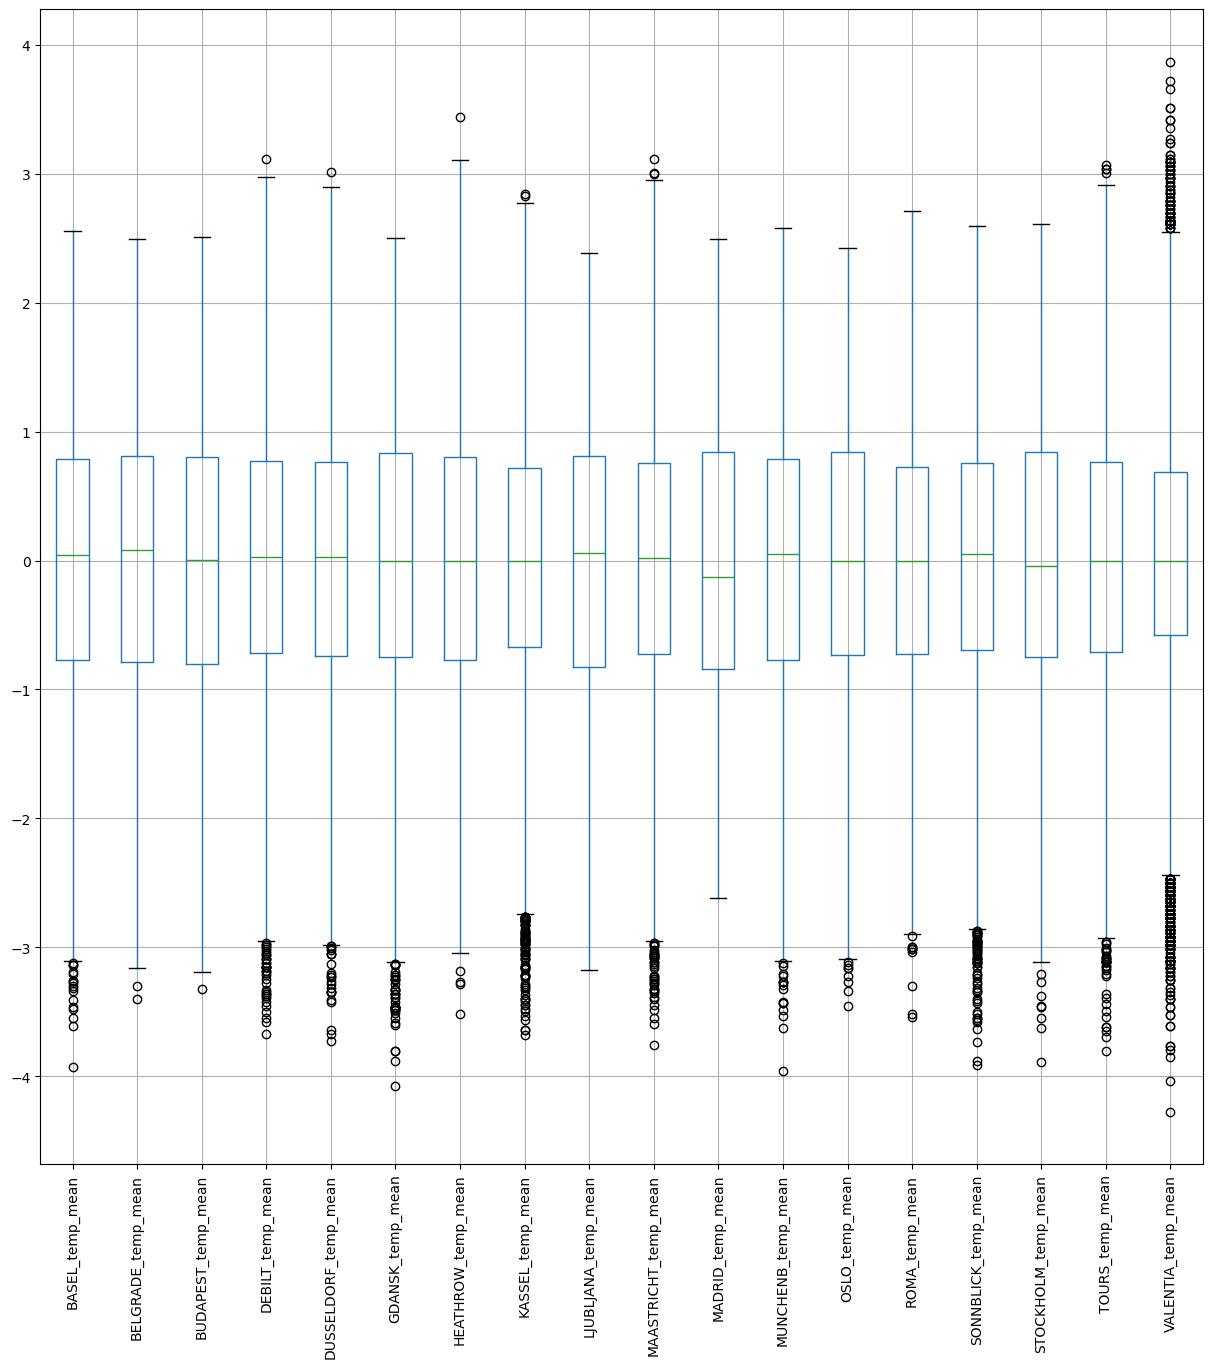

In [8]:
#Look at a whisker plot of the data to see variations in temperatures
notemp.boxplot(figsize=(15,15))
plt.xticks(rotation=90)
plt.show()

### 04. Compute loss and gradient descent for Madrid in 1995.

In [9]:
#Reduce your dataset to a single year
dfyear_1995 = df[df['DATE'].astype(str).str.contains('1995')] #<-----INSERT YEAR HERE
dfyear_1995

DATE  MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
12784  19950101      1        -1.058269           -1.141717   
12785  19950102      1        -1.479269           -1.255208   
12786  19950103      1        -1.615075           -1.550286   
12787  19950104      1        -2.090398           -1.527588   
12788  19950105      1        -2.307689           -1.482191   
...         ...    ...              ...                 ...   
13144  19951227     12        -1.682979           -1.357351   
13145  19951228     12        -1.981753           -1.765920   
13146  19951229     12        -1.954592           -1.947506   
13147  19951230     12        -1.669398           -1.856713   
13148  19951231     12        -1.370624           -1.448144   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
12784           -1.075636         -1.269379             -1.401779   
12785           -1.110927         -1.111156             -1.401779   
12786           -1.287378         -1.664934             -1.711039   
12787           -1.487355         -2.028846             -2.226471   
12788           -1.393248         -2.202890             -2.344284   
...                   ...               ...                   ...   
13144           -1.252087         -2.519335             -2.314830   
13145           -1.757914         -2.835780             -2.638816   
13146           -2.169633         -2.630091             -2.609363   
13147           -1.969655         -2.456046             -2.138111   
13148           -1.852021         -1.886446             -1.431233   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
12784         -0.684622           -1.713826         -1.260860   
12785         -1.017119           -1.783711         -1.408526   
12786         -0.838082           -1.923481         -1.807222   
12787         -1.720479           -1.748768         -2.589848   
12788         -2.027399           -1.224630         -2.648914   
...                 ...                 ...               ...   
13144         -2.116918           -2.220493         -2.087786   
13145         -2.500568           -2.272906         -2.560315   
13146         -2.193648           -2.098194         -2.486482   
13147         -2.423838           -2.045780         -2.250218   
13148         -2.871431           -1.696355         -1.718623   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
12784            -1.019663             -1.387347         -0.920885   
12785            -1.334497             -1.342338         -1.500486   
12786            -1.310279             -1.492368         -1.716151   
12787            -1.479805             -2.047481         -1.540923   
12788            -1.491914             -2.242520         -0.961322   
...                    ...                   ...               ...   
13144            -1.382933             -2.227517         -0.907406   
13145            -1.806748             -2.497572         -0.624345   
13146            -2.012601             -2.392551         -0.840010   
13147            -2.036819             -2.227517         -0.529991   
13148            -1.794639             -1.417353         -0.705220   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
12784           -1.044919       -1.157363       -0.741627   
12785           -1.359104       -1.181633       -1.499347   
12786           -1.535047       -1.776240       -1.869787   
12787           -2.000040       -1.642757       -2.088684   
12788           -2.150848       -0.878261       -2.189713   
...                   ...             ...             ...   
13144           -1.710990       -2.734894       -0.623760   
13145           -2.100579       -2.771298       -0.977362   
13146           -2.213685       -2.164556       -1.179421   
13147           -1.886934       -2.116016       -1.011039   
13148           -1.836664       -1.751971       -0.556407   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
12

In [10]:
dfyear_1995.describe()

DATE       MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
count  3.650000e+02  365.000000       365.000000          365.000000   
mean   1.995067e+07    6.526027         0.018659           -0.028878   
std    3.454755e+02    3.452584         0.973088            0.984946   
min    1.995010e+07    1.000000        -2.334850           -2.072347   
25%    1.995040e+07    4.000000        -0.732333           -0.880686   
50%    1.995070e+07    7.000000         0.068926            0.106689   
75%    1.995100e+07   10.000000         0.720797            0.787638   
max    1.995123e+07   12.000000         2.296153            1.718268   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
count          365.000000        365.000000            365.000000   
mean            -0.036751          0.071393              0.023597   
std              0.999420          1.088676              1.077828   
min             -2.228450         -2.835780             -2.638816   
25%             -0.887422         -0.668134             -0.768534   
50%             -0.016930         -0.051067             -0.076383   
75%              0.782981          0.914089              0.792488   
max              1.900505          2.464668              2.677497   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
count        365.000000          365.000000        365.000000   
mean           0.002340            0.125349          0.022978   
std            1.029000            1.090305          1.150146   
min           -2.871431           -2.272906         -2.648914   
25%           -0.774141           -0.770377         -0.906464   
50%           -0.096358           -0.001641         -0.020472   
75%            0.862769            0.941807          0.835987   
max            2.000932            2.776291          2.578438   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
count           365.000000            365.000000        365.000000   
mean              0.007645              0.090351          0.125314   
std               0.934327              1.074637          0.932190   
min              -2.036819             -2.497572         -1.716151   
25%              -0.789592             -0.682203         -0.678261   
50%               0.106474             -0.007066          0.130484   
75%               0.699815              0.848108          0.764001   
max               1.959152              2.588461          2.341055   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
count          365.000000      365.000000      365.000000   
mean            -0.001621       -0.026528       -0.035576   
std              0.965918        1.034471        1.101485   
min             -2.452465       -2.771298       -2.442287   
25%             -0.755870       -0.805452       -0.910009   
50%              0.098712       -0.101631       -0.101775   
75%              0.676811        0.808483        0.773811   
max              2.147194        2.034103        2.322927   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
count           365.000000           365.000000       365.000000   
mean             -0.052006            -0.019763         0.076890   
std               1.039829             1.026860         1.025344   
min              -2.771473            -2.568173        -2.233962   
25%              -0.767835            -0.826492        -0.649512   
50%              -0.021955            -0.241785        -0.037694   
75%               0.694675             0.840545         0.809438   
max               2.244935             2.084603         2.440952   

       VALENTIA_temp_mean  
count          365.000000  
mean             0.219222  
std              1.291818  
min             -2.831251  
25%             -0.758341  
50%              0.203008  
75%              1.074231  
max              3.868152

In [11]:
#Pick which weather station you want to use. Below is a 3D visualization of the temperatures for that year ---> Madrid

In [12]:
#Drop the DATE and MONTH data as those numbers are not scaled with the rest.
notempyear_1995 = dfyear_1995.drop(['DATE','MONTH'], axis=1)

In [13]:
#Plot ALL weather data for all stations for year 1965

#X = weather station
#Y = day of the year
#Z = temperature

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(z=notempyear_1995.values)])
fig.update_layout(title='Temperatures over time', autosize=False,
                  width=600, height=600)
fig.show()

In [14]:
#We need to make an index for the year. Create a set of data from 1 to 365 (or to 366 if it's a leap year!)
#We'll scale this by 100 as the index is made. This will help teh gradient descent converge 366 = 3.66

i = np.arange(0.01,3.66,0.01) #<---needs to be one GREATER than the total number of days
index = pd.DataFrame(data = i, columns = ['index'])
index

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
360   3.61
361   3.62
362   3.63
363   3.64
364   3.65

[365 rows x 1 columns]

In [15]:
n_rows_1995 = dfyear_1995.shape[0]
n_rows_1995

365

In [16]:
#This will translate your chosen weather data into the X and y datasets needed for the optimization function.

X=index.to_numpy().reshape(n_rows_1995,1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows_1995,1))
X = np.concatenate((ones, X), axis=1)
y=dfyear_1995['MADRID_temp_mean'].to_numpy().reshape(n_rows_1995,1) #<----INSERT WEATHER STATION HERE

In [17]:
X.shape, y.shape

((365, 2), (365, 1))

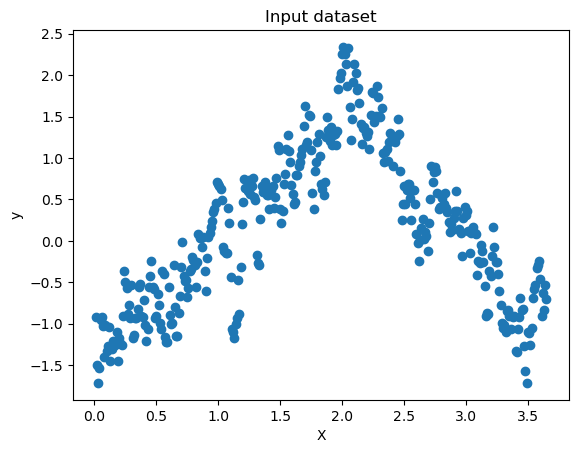

In [18]:
#Look at one year of temperature data over time
plt.scatter(x=index['index'], y=dfyear_1995['MADRID_temp_mean']) #<----INSERT WEATHER STATION HERE
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');
plt.show()

In [19]:
#what is the min temperature? (Note gradient descent is not actually finding this number)
dfyear_1995['MADRID_temp_mean'].min()

-1.7161512693476737

In [20]:
#what is the max temperature? (Note gradient descent is not actually finding this number)
dfyear_1995['MADRID_temp_mean'].max()

2.3410547996439193

In [21]:
#This computes the loss function for the gradiant descent. DO NOT CHANGE!

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [22]:
compute_cost(X,y)

array([0.44115076])

In [23]:
#This is the gradiant descent function. DO NOT CHANGE!

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [24]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=200 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[1],[1]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.01 #<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 93.8 ms
Wall time: 111 ms


In [25]:
theta

array([[ 0.26098872],
       [-0.01861792]])

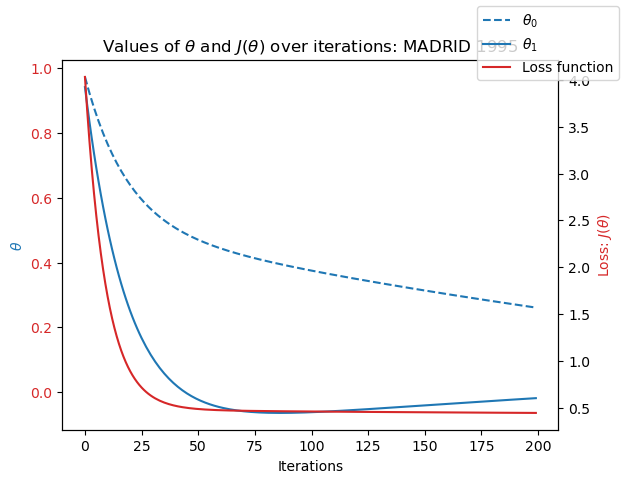

In [27]:
# Plot the loss, theta0, and theta1. If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color);

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations: MADRID 1995')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend(),
plt.show()

In [28]:
%%time
# theta range
theta0_vals = np.linspace(-10,10,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-10,10,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: total: 1.73 s
Wall time: 1.77 s


In [29]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

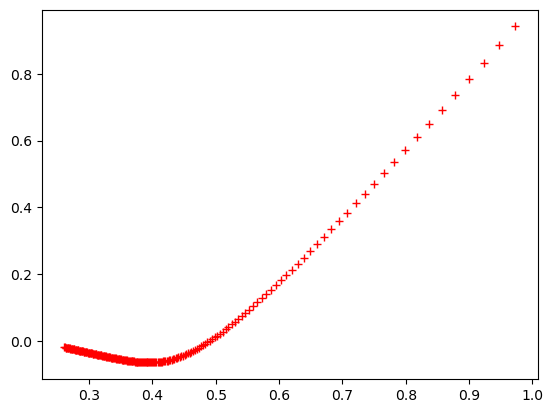

In [30]:
#Here is the same figure as above, with the line the loss function takes toward the minimum.

#X = Theta0
#Y - Theta1
#Z = Loss
#black line = path of loss function over the iterations.
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history, y=theta0_history, z=J_history, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history, theta1_history, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()
plt.show()

In [31]:
#Rerun the optimization above, but this time start closer to the objective!
#Find where the black line ends near the lowest X/Y/Z coordinate and make that your guess below.

num_iterations=200 #<---start with the same iterations as above
theta_init=np.array([[0.4],[-0.05]]) #<---make a guess as to a more accurate [x],[y] coordinates near the minimum in the graph above.
alpha= 0.01 #<---start with the same step size as above
theta1, J_history1, theta0_history1, theta1_history1 = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

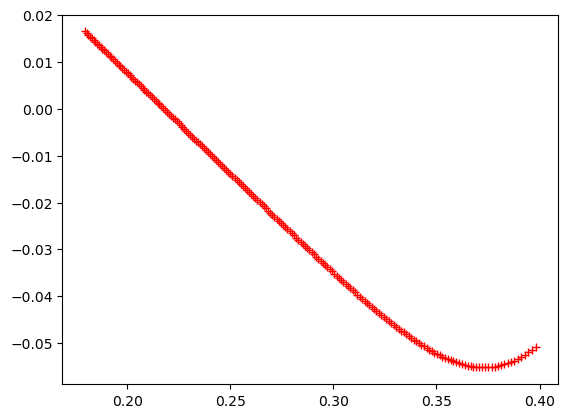

In [32]:
#Let's look at the new loss path on the function. It should start much closer to the goal

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history1, y=theta0_history1, z=J_history1, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history1, theta1_history1, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show(),
plt.show()

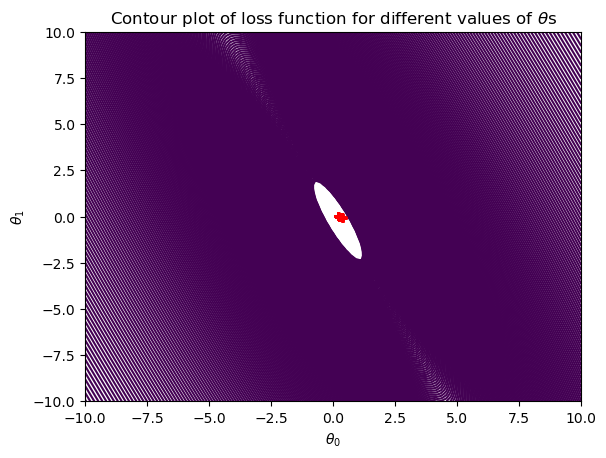

In [33]:
#This plot shows the convergence similar to above, but only in the X/Y plane (there's no height)

plt.contour(theta0_vals, theta1_vals, J_vals, levels = np.logspace(0,10,1000))
plt.xlabel('$\\theta_{0}$'); plt.ylabel("$\\theta_{1}$")
plt.title("Contour plot of loss function for different values of $\\theta$s");
plt.plot(theta0_history1, theta1_history1, 'r+');
plt.show()